# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 9383 Рыбников Роман и Сергиенкова Анастасия. Вариант №9

# Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

$\bullet$ Дискретный сигнал $\displaystyle x_0, \dots, x_{N-1}$, как правило, получается при дискретизации аналогового (определённого во все моменты времени) сигнала $\displaystyle s(t)$

Пусть отсчёты $\displaystyle x_k$, дискретного сигнала получены в результате равномерной дискретизации сигнала $\displaystyle s(t)$ с шагом дискретизации, равным единице. 

$$x_k = \displaystyle s(t_k)$$, где $\displaystyle t_k - t_{k-1}=T, k = 0,1,\dots N-1, T=1$

Если 

$$\displaystyle t_k - t_{k-1}= \Delta T$$, где $\displaystyle \Delta t \not = 1, k = 1, 2,\dots, N-1$, 

то вводим $\displaystyle \hat t_k = \dfrac{(t_k - t_0)}{\Delta t}$, где $\displaystyle k = 0,1,\dots N-1$

Получаем

$$\displaystyle \hat t_k = k \\ s(\hat t_k)=s(k\Delta t)$$

, где $\displaystyle k = 0, 1, \dots, N-1$

$\bullet$ Дискретное преобразование Фурье. Так как $\displaystyle s(t)$ переодическая функция, то её можно разложить в ряд Фурье, коэффициенты которого вычисляются по формуле:

$$\displaystyle X(n)=\dfrac{1}{NT}\int_0^{NT}s(t)\cdot e^{-i\omega_nt}\mathrm{d}x \\ X(n) = \sum_{k=0}^{N-1}x_ke^{-i\frac{2\pi nk}{N}}$$

, где $\displaystyle n = 0,1,\dots,N-1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
from math import pi

In [2]:
def plot(df, param_y, title):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x='t', y=param_y, linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
    ax.set_axis_labels(r'$t$', r'$x(t)$')
    plt.title(title)
    plt.show()
    
def plot_lines(df, title, param_x1, param_x2, oX, oY):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x=param_x1, y='Y', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
    plt.vlines(x=param_x2, ymin=0, ymax=df['Y'], linewidth=2.2)
    ax.set_axis_labels(oX, oY)
    plt.title(title)
    plt.show()
    
def plot_lines_x2(data, df, title, param_x, param_x2, param_ymax, param_ymin, oX, oY):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=data, x=param_x, y='vals', hue='', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax], linewidth=2.2, linestyles='--')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymin], linewidth=2.2, color='red')
    ax.set_axis_labels(oX, oY)
    plt.title(title)
    plt.show()
    
def plot_lines_x3(data, df, title, param_x, param_x2, param_ymin, param_ymax, param_ymax1, oX, oY):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=data, x=param_x, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymin], linewidth=2.2, linestyles='dotted')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax], linewidth=2.2, linestyles='dashed', color='green')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax1], linewidth=2.2, color='red')
    ax.set_axis_labels(oX, oY)
    plt.title(title)
    plt.show()
    
def plot_H(df, title="None"):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x='t', y='vals', hue='', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
    ax.set_axis_labels(r'$t$', r'$\tilde H(t)$')
    plt.title(title)
    plt.show()

## Пункт 1

$\bullet$ Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчёта ($N=31$).

In [3]:
def signal(n):
    t, Y = np.linspace(0, 31, n),0
    A = np.random.randint(1, 11, 11)
    W = np.arange(0, 1.01*np.pi, 0.1*np.pi)
    Phi = np.random.uniform(0, 0.5, [11,])
    for a, w, phi in zip(A, W, Phi):
        Y += a*np.cos(w*t+phi)
    Y = Y/np.sum(A)
    return t, Y

In [4]:
t, Y = signal(310)
df_analog = pd.DataFrame({'t': t, 'Y': Y})

In [5]:
df_digital = df_analog.iloc[np.concatenate((np.linspace(0, 300, 31), [309]), axis=0)]

## Пункт 2

$\bullet$ Визуализировать исходные аналоговый и дискретизированный сигналы.

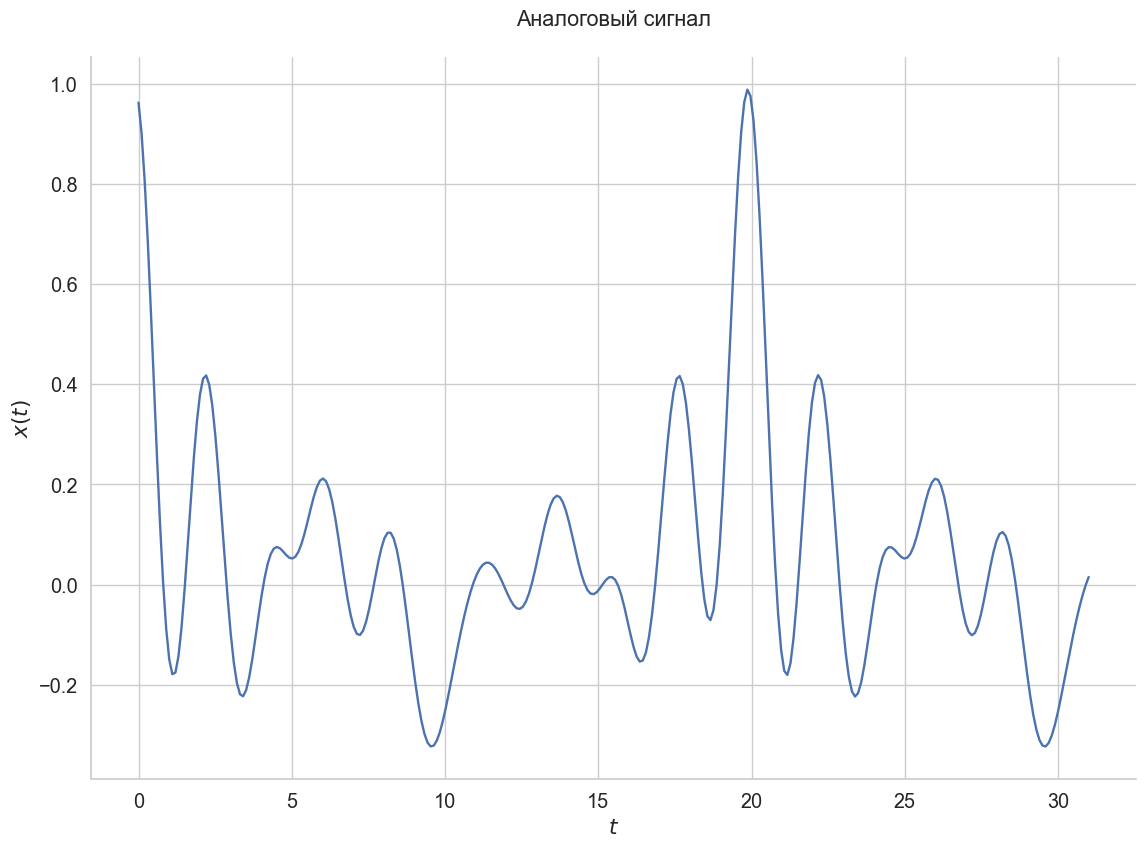

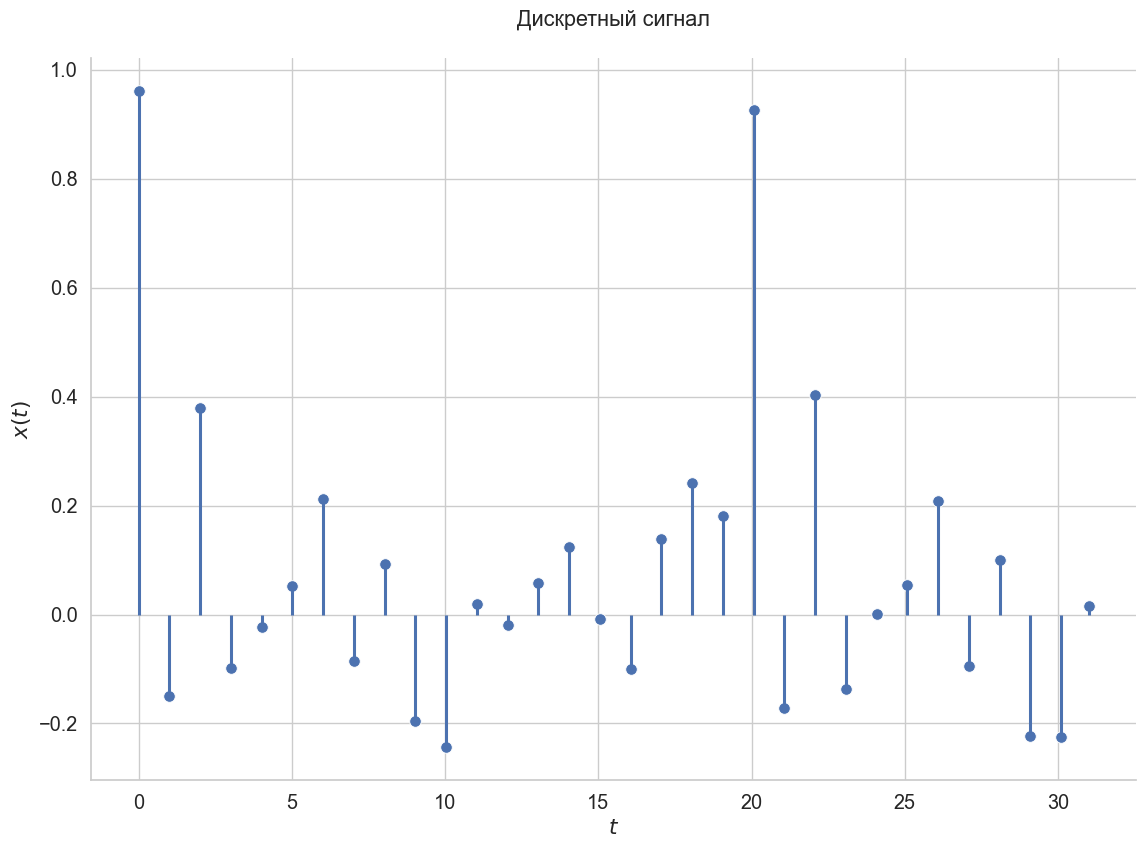

In [6]:
plot(df_analog, 'Y',"Аналоговый сигнал\n")
plot_lines(df_digital, "Дискретный сигнал\n", 
           't', df_digital['t'],
          r'$t$', r'$x(t)$')

## Пункт 3

$\bullet$ С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Представим дискретный сигнал в виде функции от времени:

$$\displaystyle s(t)=\sum_{k=-\infty}^\infty x_k\delta(t-k)$$

Тогда спектр дискретного сигнала:

$$\displaystyle S(\omega)=\sum_{k=-\infty}^\infty x_ke^{-i\omega k}$$

Другое представление дискретного сигнала:

$$\displaystyle s_d(t)=s(t)\sum_{k=-\infty}^\infty \delta(t-kT)$$

Представим полученноу сумму в виде комплексного ряда Фурье:

$$\displaystyle S_d(\omega)=\dfrac{1}{T}\sum_{k=-\infty}^\infty S\bigg(\omega - \dfrac{2\pi k}{T}\bigg)$$

In [7]:
df_p3 = df_digital.copy()
df_p3['Y'] = np.abs((df_p3['Y'].values))

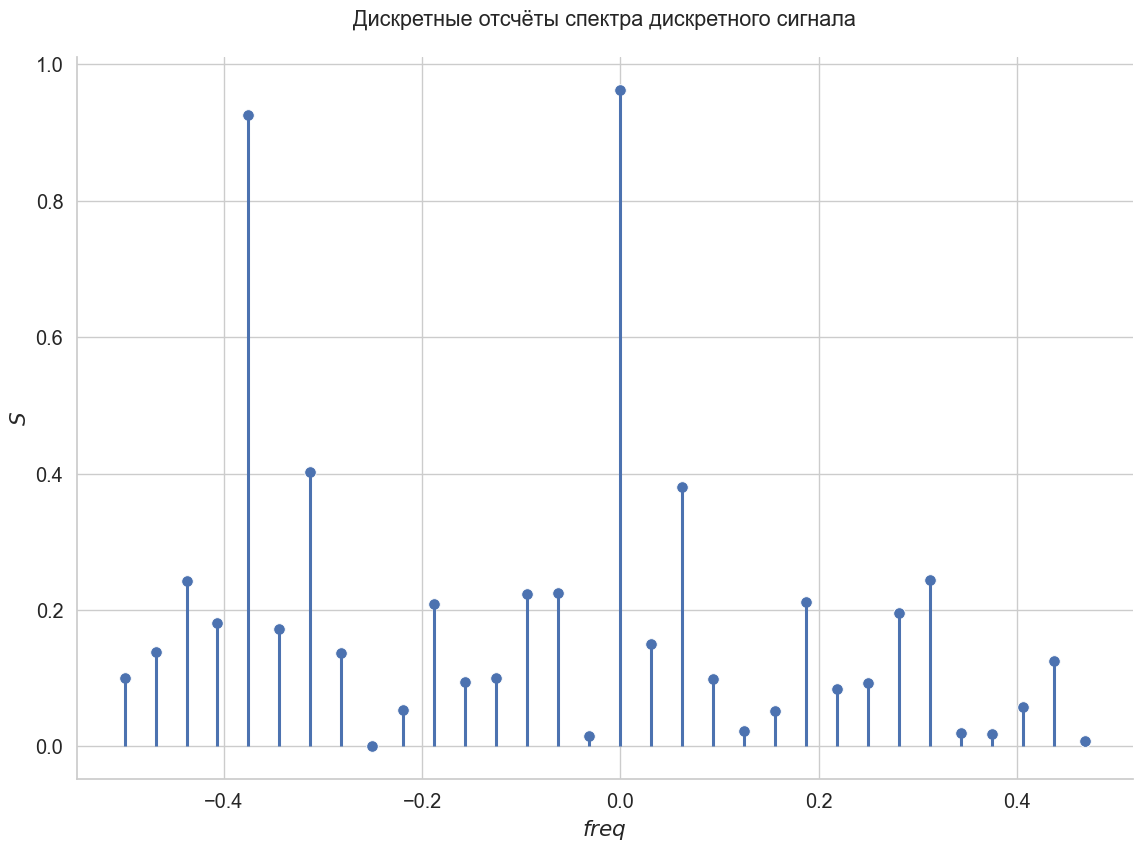

In [8]:
plot_lines(df_p3, "Дискретные отсчёты спектра дискретного сигнала\n", 
           fftfreq(32,1), fftfreq(32,1),
          r'$freq$', r'$S$')

Спектр симметричен относительно нуля. Он представляет разложение исходного сигнала в линейную комбинацию простых синусоидальных функций, отражя амплитуды этих функций на разных частотах.

## Пункт 4

$\bullet$ Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание по $5$ и $9$ точкам осуществляется с помощью полинома первой степени, а коэффициенты в передаточной функции одинаковы.

Передаточные функции $5$-точечного и $9$-точечного НЦФ в $z$-области:

$$\displaystyle H_5(z) = \dfrac{1}{5}\big(z^{-2}+z^{-1}+1+z^1+z^2\big)
\\H_9(z)=\dfrac{1}{9}\big(z^{-4}+z^{-3}+z^{-2}+z^{-1}+z^{-1}+1+z^1+z^2+z^3+z^4\big)$$

Общая формула передаточной функции в частотной области:

$$\displaystyle H(\omega)=\dfrac{sin\Big(\big(N+\frac{1}{2}\big)\cdot\omega\Big)}{\Big(N+\frac{1}{2}\Big)}=sinc\Bigg(\bigg(n+\dfrac{1}{2}\bigg)\cdot\omega\Bigg)$$

## Пункт 5

$\bullet$ Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

In [9]:
df_p4 = df_digital.copy()
df_p4['original'] = df_p4['Y']

df_p4['5points'] = np.convolve(df_digital['Y'], np.ones(5), 'same') / 5
df_p4['9points'] = np.convolve(df_digital['Y'], np.ones(9), 'same') / 9

df_p4_5 = df_p4.melt(id_vars='t', value_vars=['original', '5points'], var_name='', value_name='vals')
df_p4_9 = df_p4.melt(id_vars='t', value_vars=['original', '9points'], var_name='', value_name='vals')

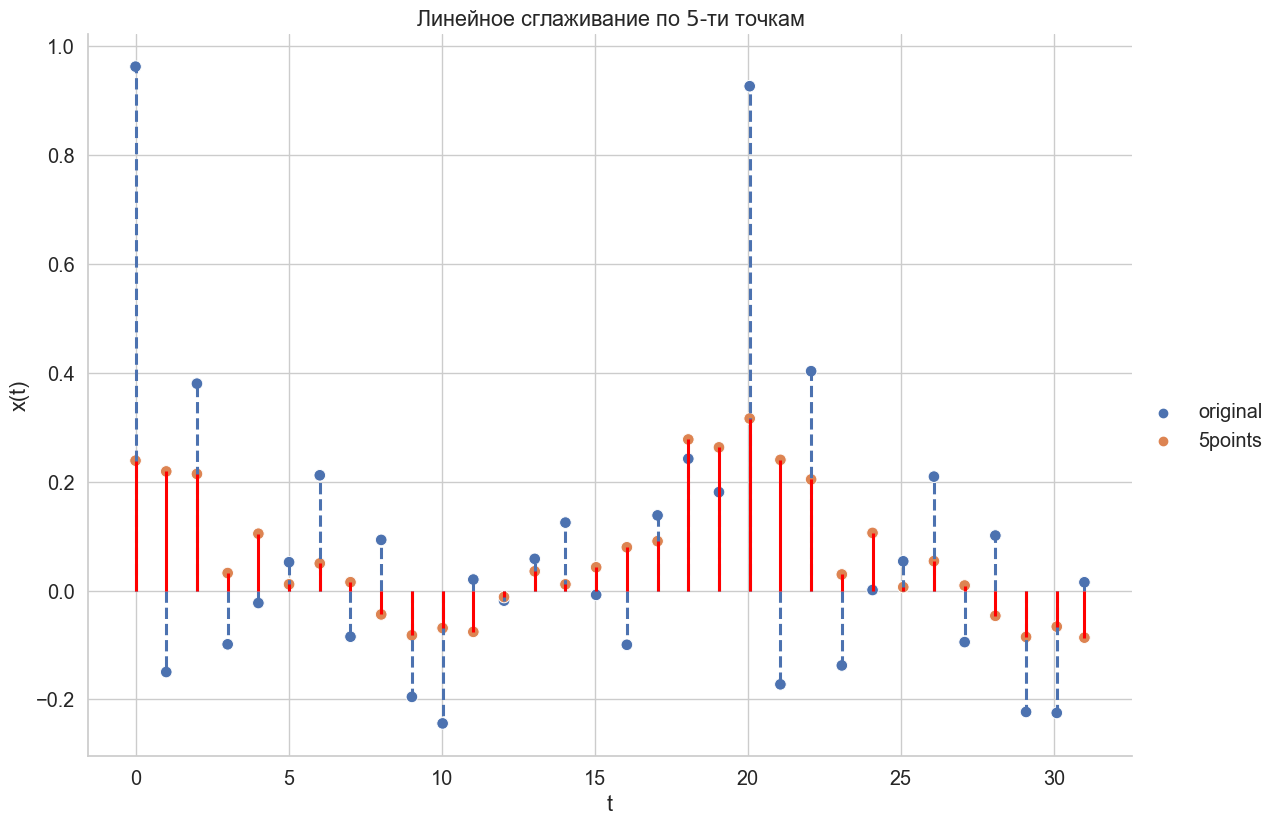

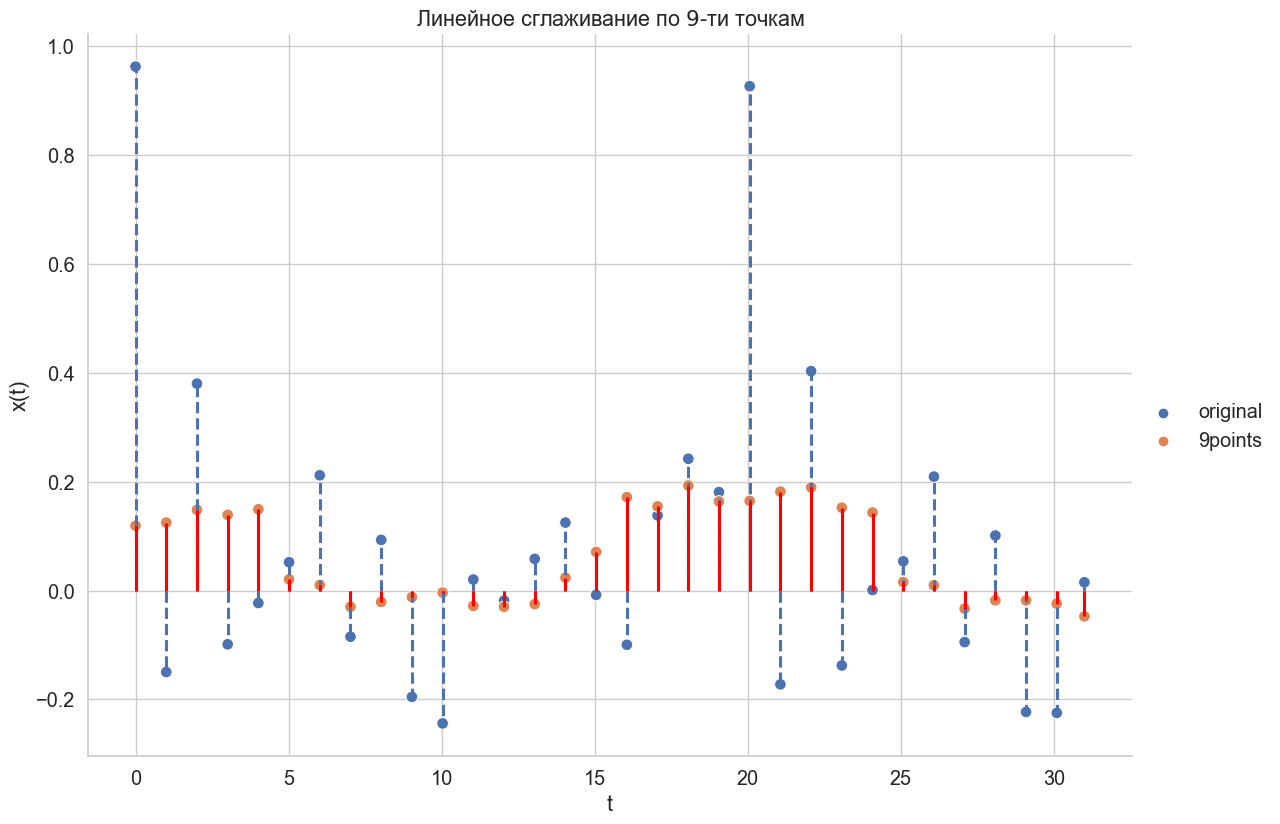

In [10]:
plot_lines_x2(df_p4_5, df_p4, 
              r"Линейное сглаживание по $5$-ти точкам",
             't', df_p4['t'], 'original', '5points', r't', r'x(t)')
plot_lines_x2(df_p4_9, df_p4, 
              r"Линейное сглаживание по $9$-ти точкам",
             't', df_p4['t'], 'original', '9points', r't', r'x(t)')

## Пункт 6

$\bullet$ С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

In [11]:
fftf_dt = np.concatenate((fftfreq(32, 1), fftfreq(32, 1)), axis=0)
fftf_t = fftfreq(32, 1)

df_p4['DFP_original'] = 2*np.abs(fft(df_p4['Y'].values)) / 32
df_p4['DFP_5_points'] = 2*np.abs(fft(df_p4['5points'].values)) / 32
df_p4['DFP_9_points'] = 2*np.abs(fft(df_p4['9points'].values)) / 32

df_p4_5_dfp = df_p4.melt(id_vars='t', value_vars=['DFP_original', 'DFP_5_points'], var_name='', value_name='vals')
df_p4_9_dfp = df_p4.melt(id_vars='t', value_vars=['DFP_original', 'DFP_9_points'], var_name='', value_name='vals')

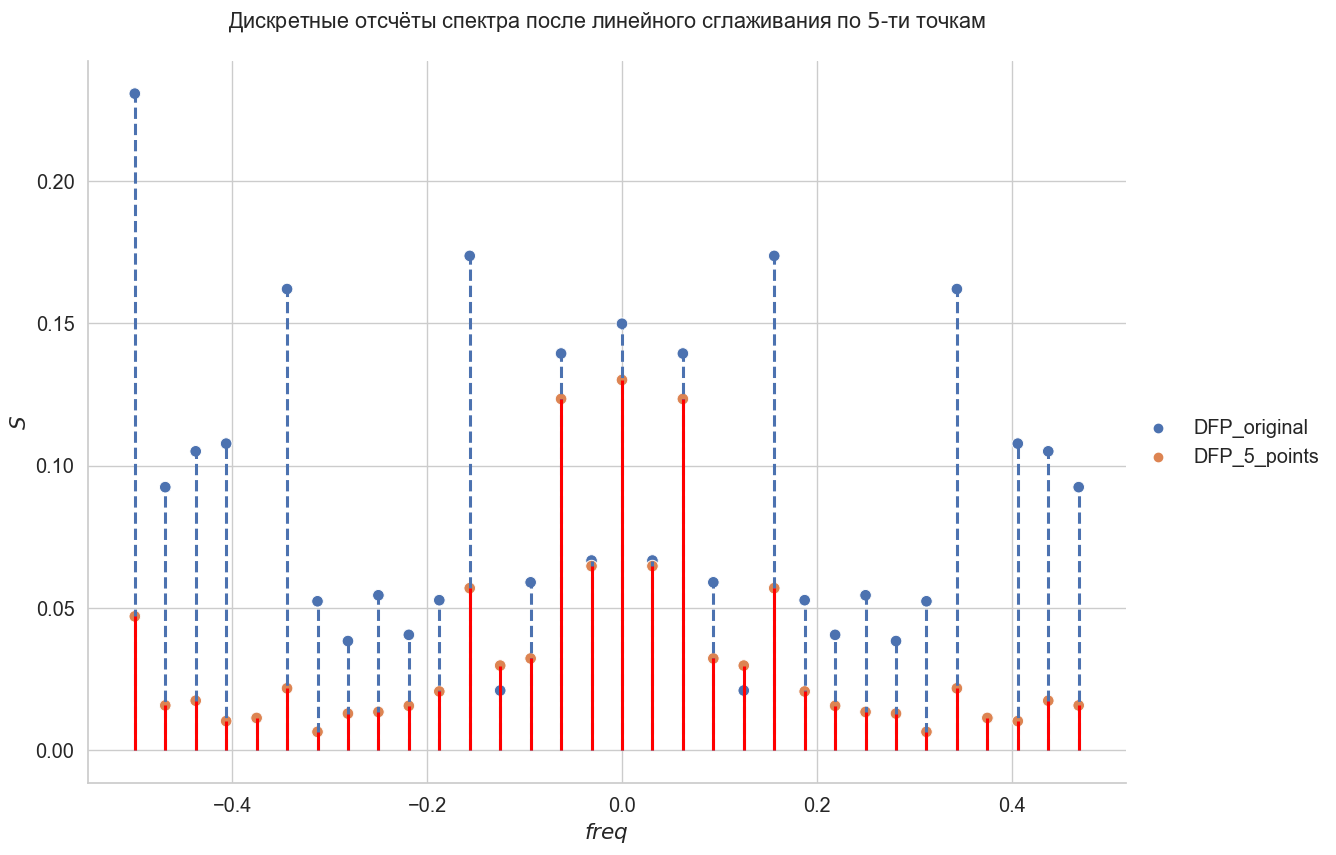

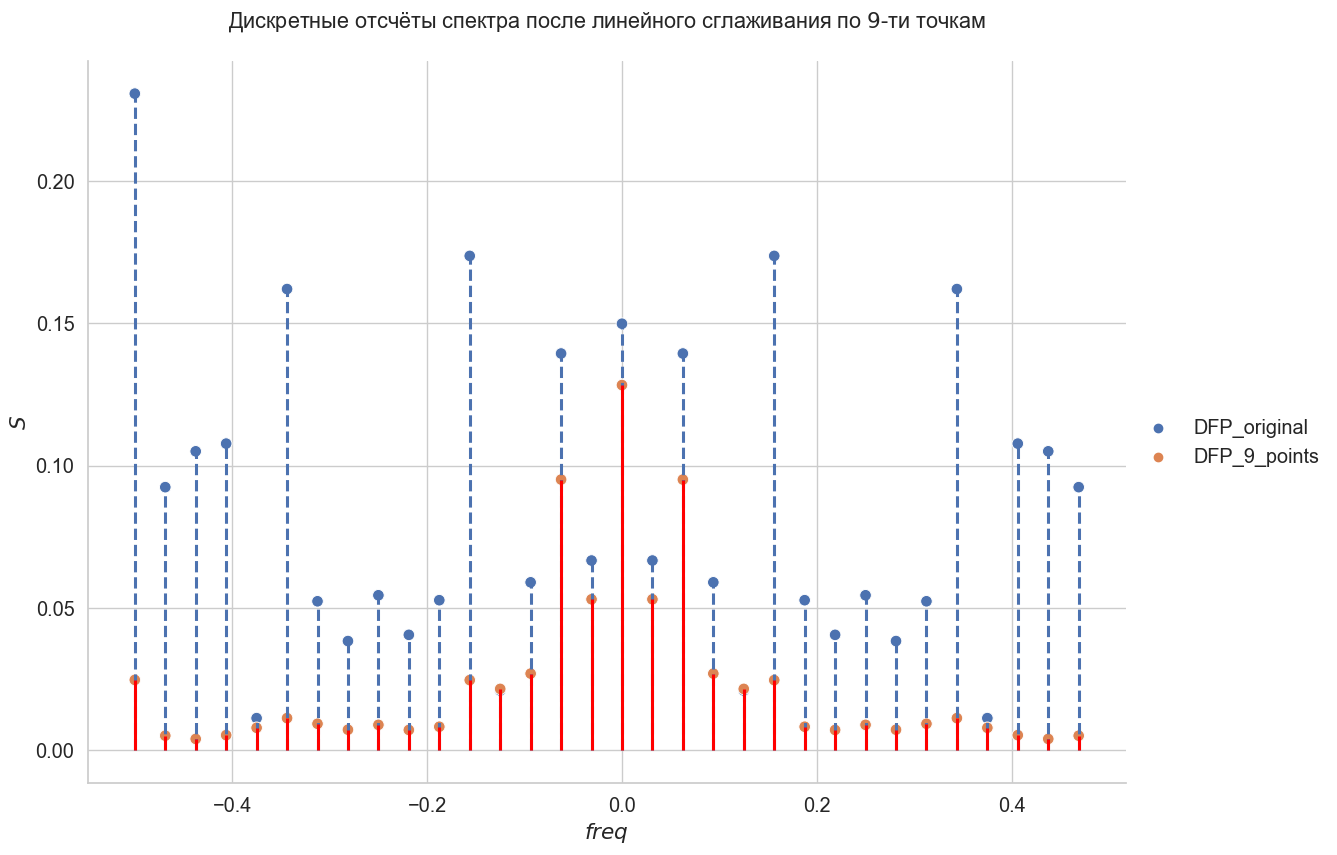

In [12]:
plot_lines_x2(df_p4_5_dfp, df_p4,
             "Дискретные отсчёты спектра после линейного сглаживания по $5$-ти точкам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_5_points',
             r'$freq$', r'$S$')

plot_lines_x2(df_p4_9_dfp, df_p4,
             "Дискретные отсчёты спектра после линейного сглаживания по $9$-ти точкам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_9_points',
             r'$freq$', r'$S$')

Можно заметить, что без ослабления пропускается только сигнал нулевой частоты (постоянного уровня). При увеличении числа точек, полоса пропускания становистя более узкой.

## Пункт 7

$\bullet$ Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

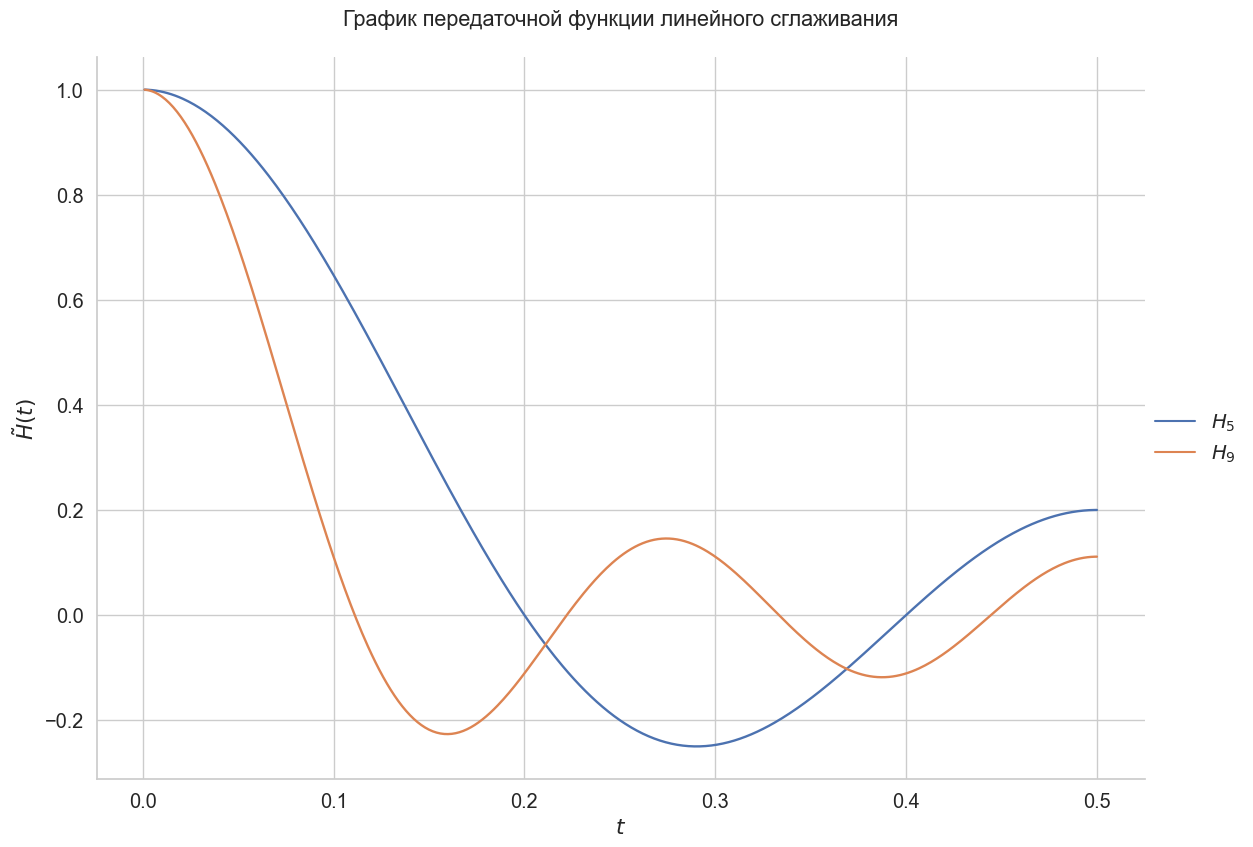

In [13]:
th = np.linspace(0.001, 0.5, 500)

H_5 = lambda f: (np.sin(5*pi*f))/(5*np.sin(pi*f))
H_9 = lambda f: (np.sin(9*pi*f))/(9*np.sin(pi*f))

df = pd.DataFrame({'t': th, r'$H_5$': H_5(th), r'$H_9$': H_9(th)})
df_m = df.melt(id_vars='t', var_name='', value_name='vals')
plot_H(df_m, "График передаточной функции линейного сглаживания\n")

Преобразование Фурье сопостовляет непрерывной во времени бесконечной функции $\displaystyle y_n$ другую, непрерывную по частоте, бесконечную функцию, а именно спектр $\displaystyle X(n)$. Графики подтверждают сделанные выводы касаемо полосы пропускания и ослабления уровня.

## Пункт 8

$\bullet$ Повторить п. 4–7 для следующих фильтров:

    a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
    b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

Формулы передаточных функций для сглаживания полиномом второй степени по $5$ и $9$ узлам:

$$\displaystyle H_5(\omega)=\dfrac{\big(17+24cos(\omega)-6cos(2\omega)\big)}{35}\\
H_9(\omega)\dfrac{\big(59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)\big)}{231}$$

In [14]:
df_p8 = df_digital.copy()
df_p8['original'] = df_p8['Y']
df_p8 = df_p8.drop(['Y'], axis=1)
df_p8['5points'] = np.convolve(df_digital['Y'], np.array([-3, 12, 17, 12, -3]), 'same') / 35
df_p8['9points'] = np.convolve(df_digital['Y'], np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]), 'same') / 231

df_p8_m = df_p8.melt(id_vars='t', var_name='cols', value_name='vals')

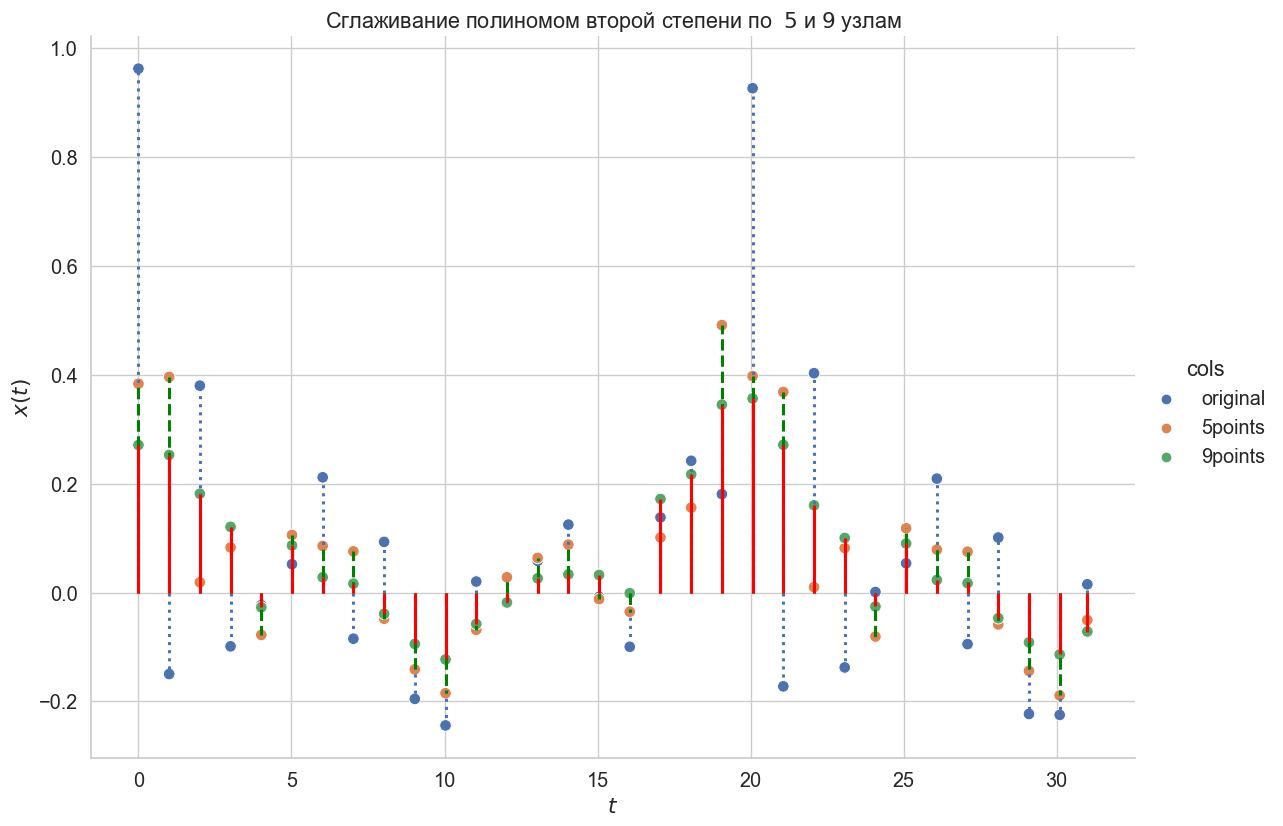

In [15]:
plot_lines_x3(df_p8_m, df_p8,
             r"Сглаживание полиномом второй степени по  $5$ и $9$ узлам",
             't', df_p8['t'],
             'original', '5points', '9points',
             r'$t$', r'$x(t)$')

# plot(df_p8_m, 'vals','')

In [16]:
fftf_dt = np.concatenate((fftfreq(32, 1), fftfreq(32, 1)), axis=0)
fftf_t = fftfreq(32, 1)


df_p4['DFP_original'] = 2*np.abs(fft(df_p4['Y'].values)) / 32
df_p4['DFP_5_points'] = 2*np.abs(fft(df_p4['5points'].values)) / 32
df_p4['DFP_9_points'] = 2*np.abs(fft(df_p4['9points'].values)) / 32

df_p4_5_dfp = df_p4.melt(id_vars='t', value_vars=['DFP_original', 'DFP_5_points'], var_name='', value_name='vals')
df_p4_9_dfp = df_p4.melt(id_vars='t', value_vars=['DFP_original', 'DFP_9_points'], var_name='', value_name='vals')

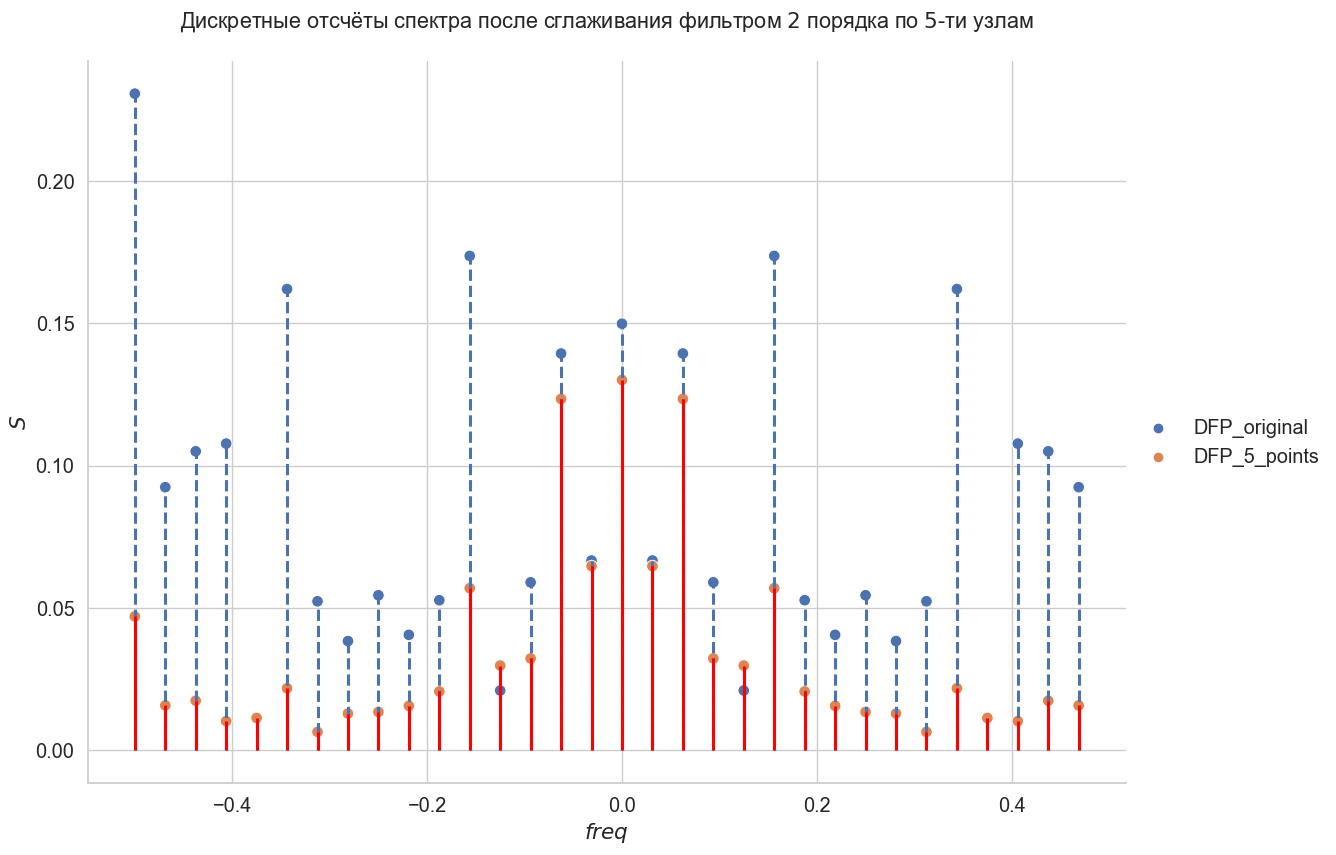

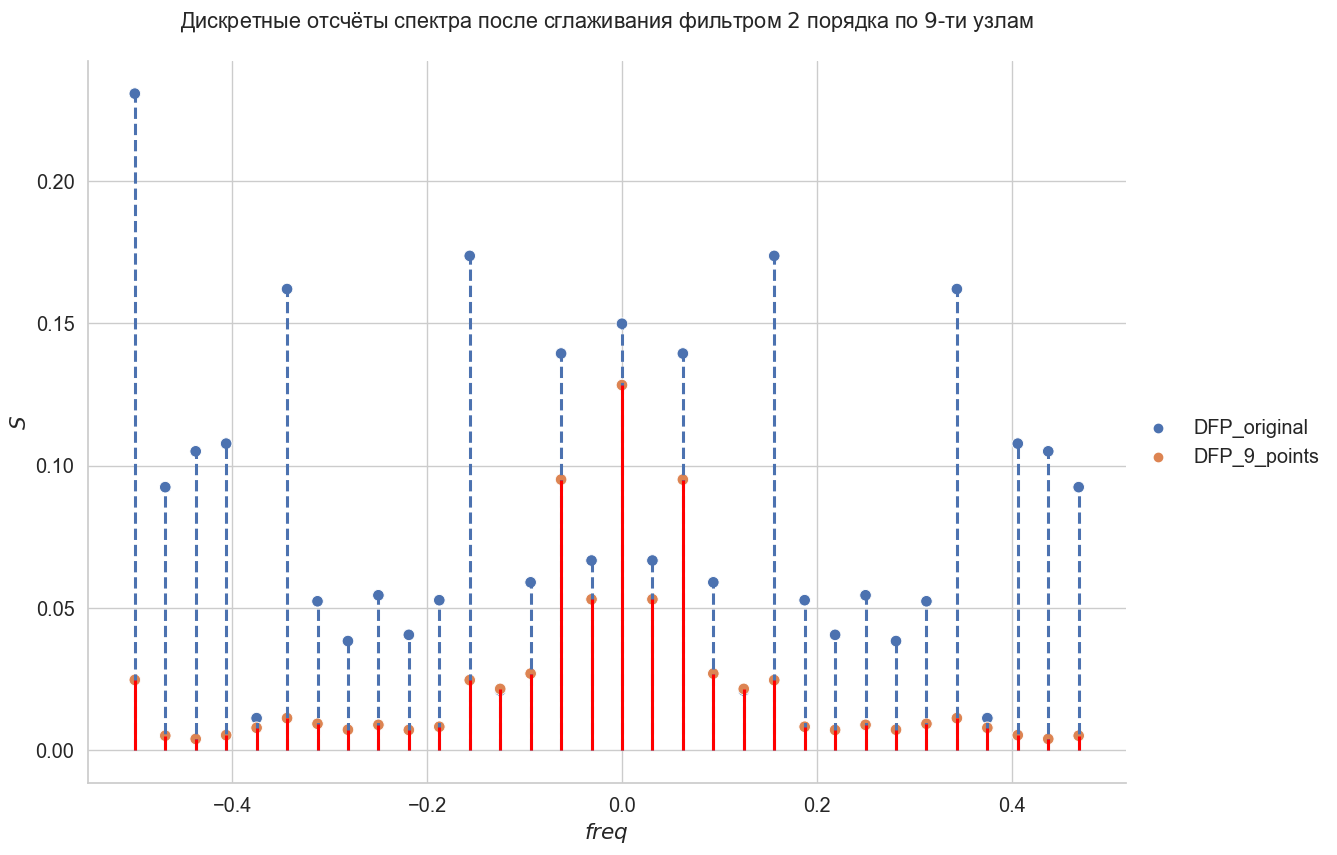

In [17]:
plot_lines_x2(df_p4_5_dfp, df_p4,
             "Дискретные отсчёты спектра после сглаживания фильтром $2$ порядка по $5$-ти узлам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_5_points',
             r'$freq$', r'$S$')

plot_lines_x2(df_p4_9_dfp, df_p4,
             "Дискретные отсчёты спектра после сглаживания фильтром $2$ порядка по $9$-ти узлам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_9_points',
             r'$freq$', r'$S$')

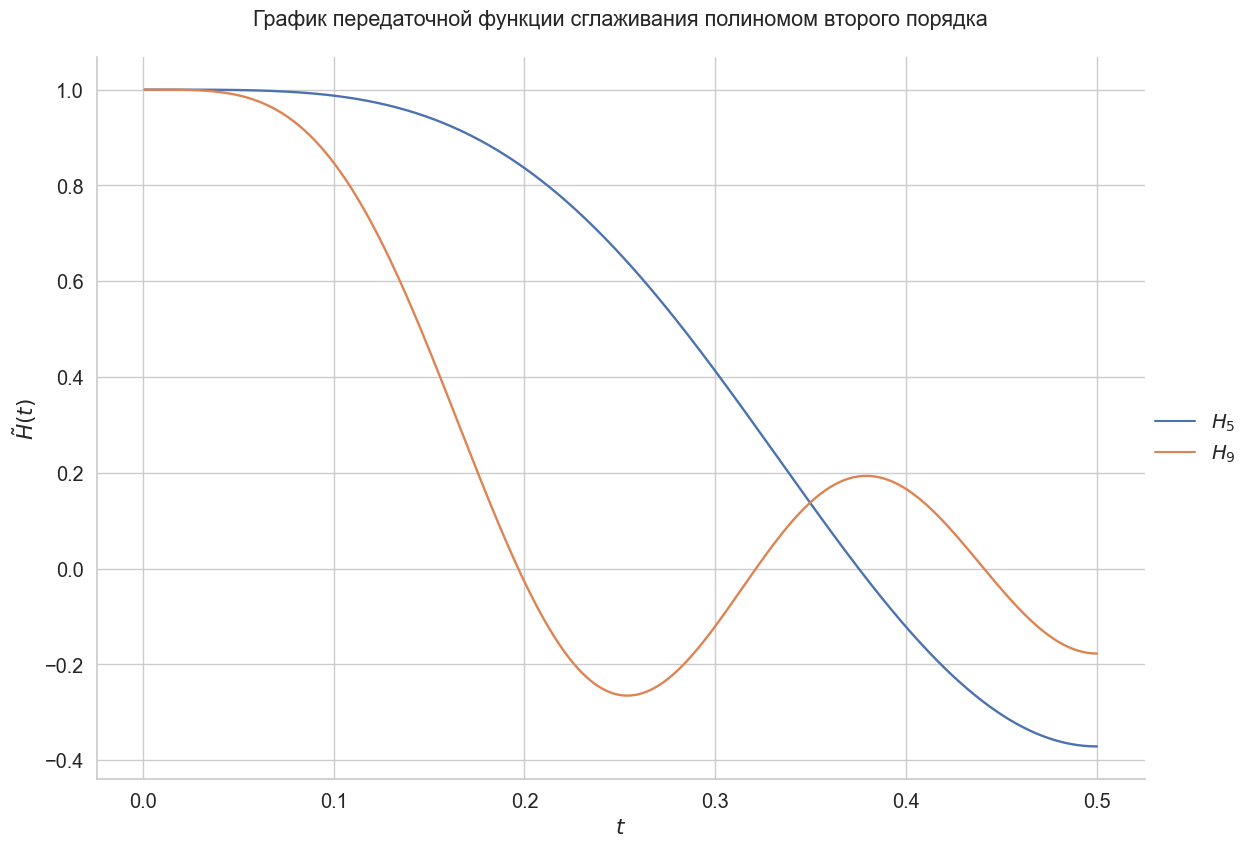

In [18]:
H_5 = lambda f: 1/35 * (17 + 24*np.cos(2*pi*f) - 6*np.cos(4*pi*f))
H_7 = lambda f: 1/21 * (7 + 12*np.cos(2*pi*f) + 6*np.cos(4*pi*f) - 4*np.cos(6*pi*f))
H_9 = lambda f: 1/231 * (59 + 108*np.cos(2*pi*f) + 78*np.cos(4*pi*f) + 28*np.cos(6*pi*f) - 42*np.cos(8*pi*f))
H_11 = lambda f: 1/429 * (89 + 168*np.cos(2*pi*f) + 138*np.cos(4*pi*f) + 88*np.cos(6*pi*f) + 18*np.cos(8*pi*f) - 72*np.cos(10*pi*f))

df = pd.DataFrame({'t': th, r'$H_5$': H_5(th), r'$H_9$': H_9(th)})
df_m = df.melt(id_vars='t', var_name='', value_name='vals')
plot_H(df_m, "График передаточной функции сглаживания полиномом второго порядка\n")

Анализируя графики, можно заметить, что при увеличении числа точек, увеличивается срез и уменьшается полоса пропускания. Присутствует пологая часть в полосе пропускания около нуля, в отличии от линейного фильтра, следовательно, пропускаются сигнала низкой частоты практически без потерь амплитуды в более широком диапазоне.

Формулы передаточных функций для сглаживания полиномом четвёртой степени по $7$ и $1$ узлам:

$$\displaystyle H_7(\omega)=\dfrac{\big(131+150cos(\omega)-60cos(2\omega)+10cos(3\omega)\big)}{231}\\
H_{11}(\omega)\dfrac{\big(143+240cos(\omega)+120cos(2\omega)-20cos(3\omega)-90cos(4\omega)+36cos(5\omega)\big)}{429}$$

In [19]:
df_p8_ = df_digital.copy()
df_p8_['original'] = df_p8_['Y']
df_p8_ = df_p8_.drop(['Y'], axis=1)

df_p8_['7points'] = np.convolve(df_digital['Y'], np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
df_p8_['11points'] = np.convolve(df_digital['Y'], np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429
df_p8__m = df_p8_.melt(id_vars='t', var_name='cols', value_name='vals')

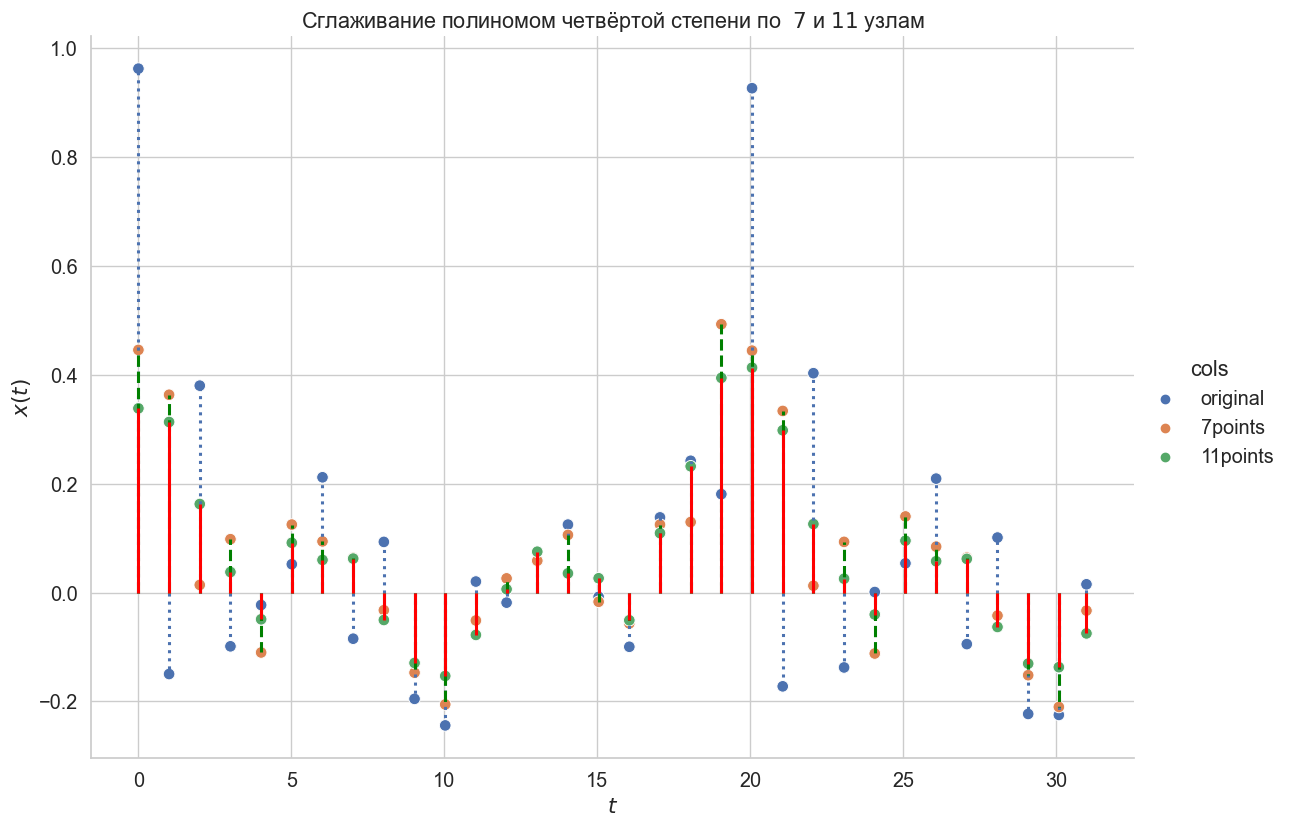

In [20]:
plot_lines_x3(df_p8__m, df_p8_,
             r"Сглаживание полиномом четвёртой степени по  $7$ и $11$ узлам",
             't', df_p8_['t'],
             'original', '7points', '11points',
             r'$t$', r'$x(t)$')

In [21]:
df_p8_['DFP_original'] = 2 * np.abs(fft(df_p8_['original'].values)) / 32
df_p8_['DFP_7_points'] = 2 * np.abs(fft(df_p8_['7points'].values)) / 32
df_p8_['DFP_11_points'] = 2 * np.abs(fft(df_p8_['11points'].values)) / 32

df_p8__7_dfp = df_p8_.melt(id_vars='t', value_vars=['DFP_original', 'DFP_7_points'], var_name='', value_name='vals')
df_p8__11_dfp = df_p8_.melt(id_vars='t', value_vars=['DFP_original', 'DFP_11_points'], var_name='', value_name='vals')

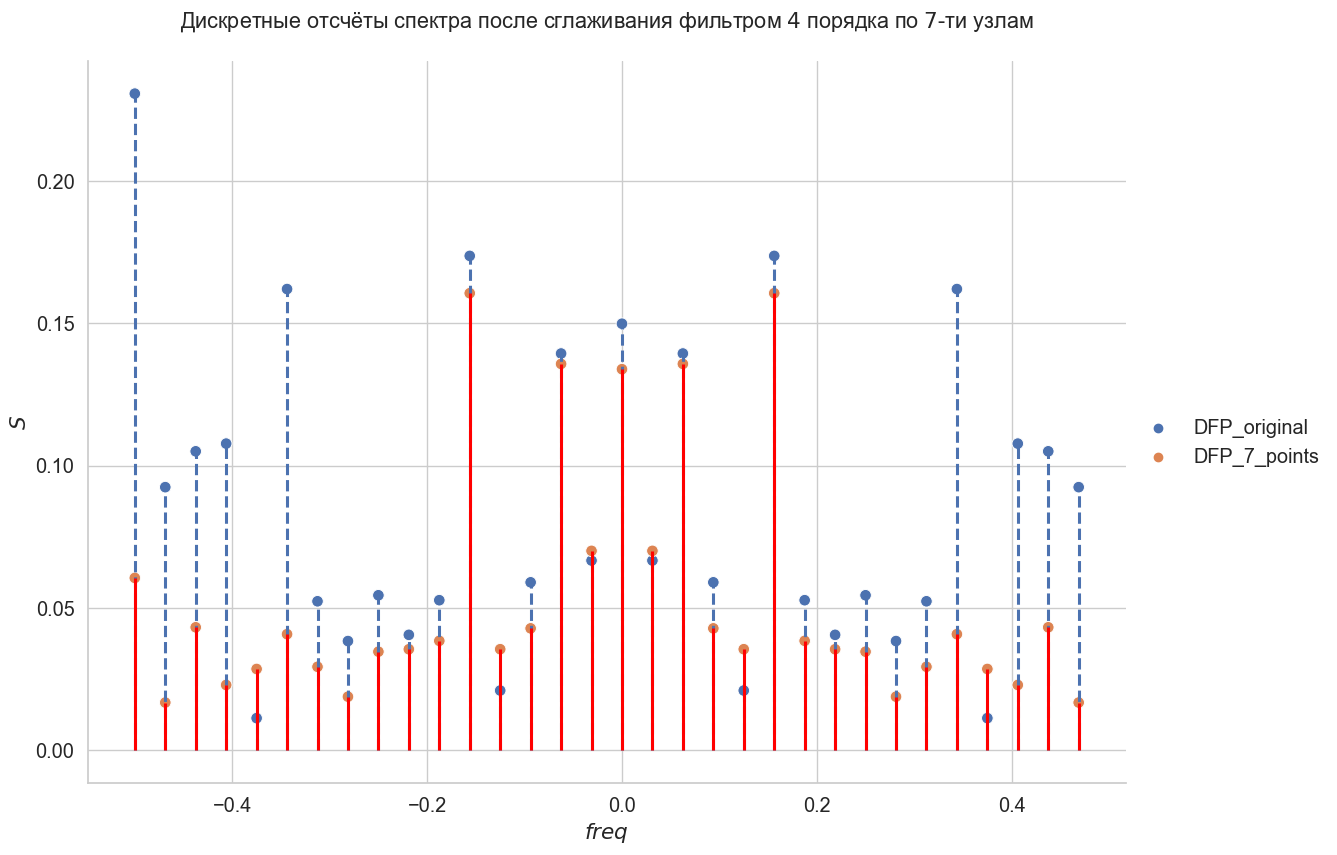

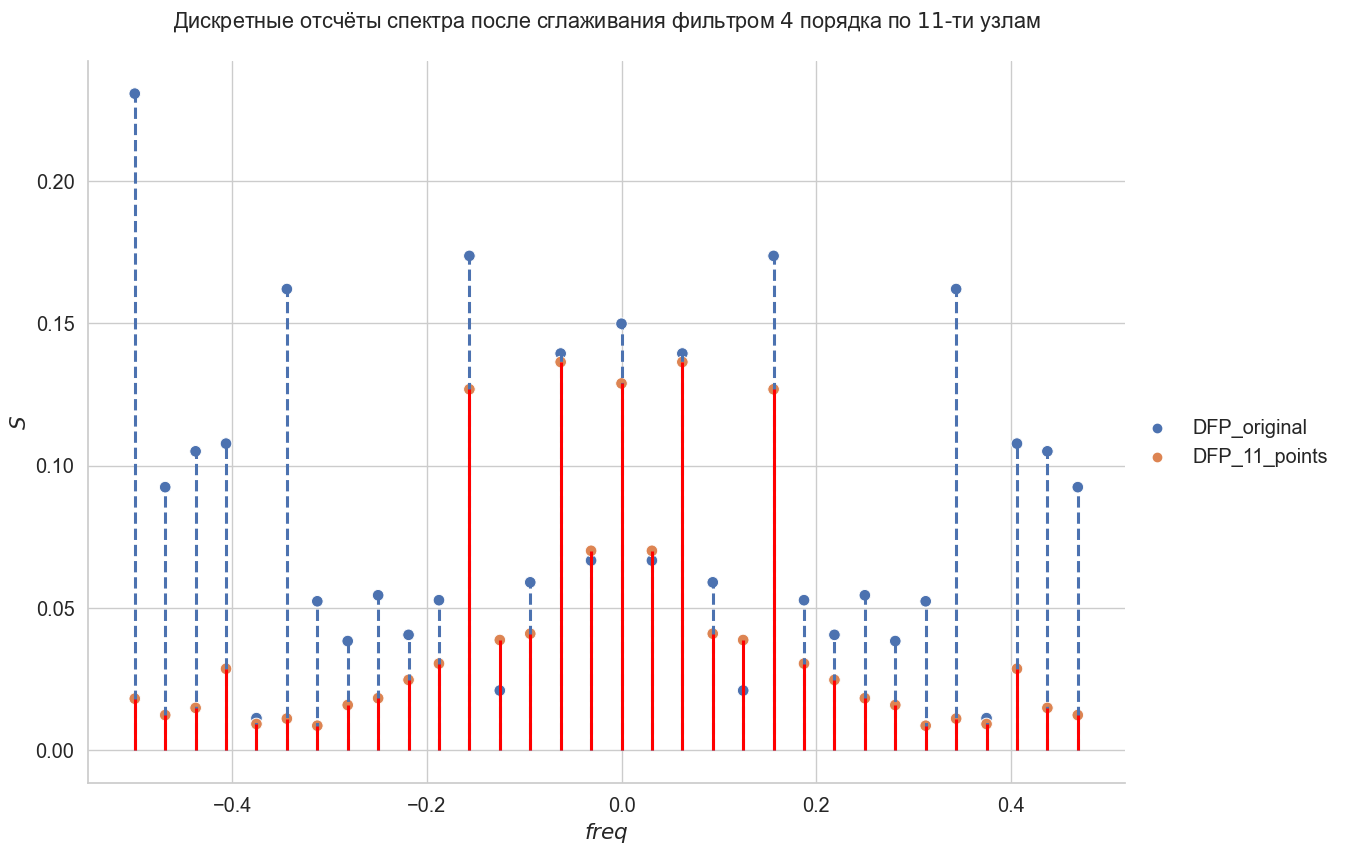

In [22]:
plot_lines_x2(df_p8__7_dfp, df_p8_,
             "Дискретные отсчёты спектра после сглаживания фильтром $4$ порядка по $7$-ти узлам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_7_points',
             r'$freq$', r'$S$')

plot_lines_x2(df_p8__11_dfp, df_p8_,
             "Дискретные отсчёты спектра после сглаживания фильтром $4$ порядка по $11$-ти узлам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_11_points',
             r'$freq$', r'$S$')

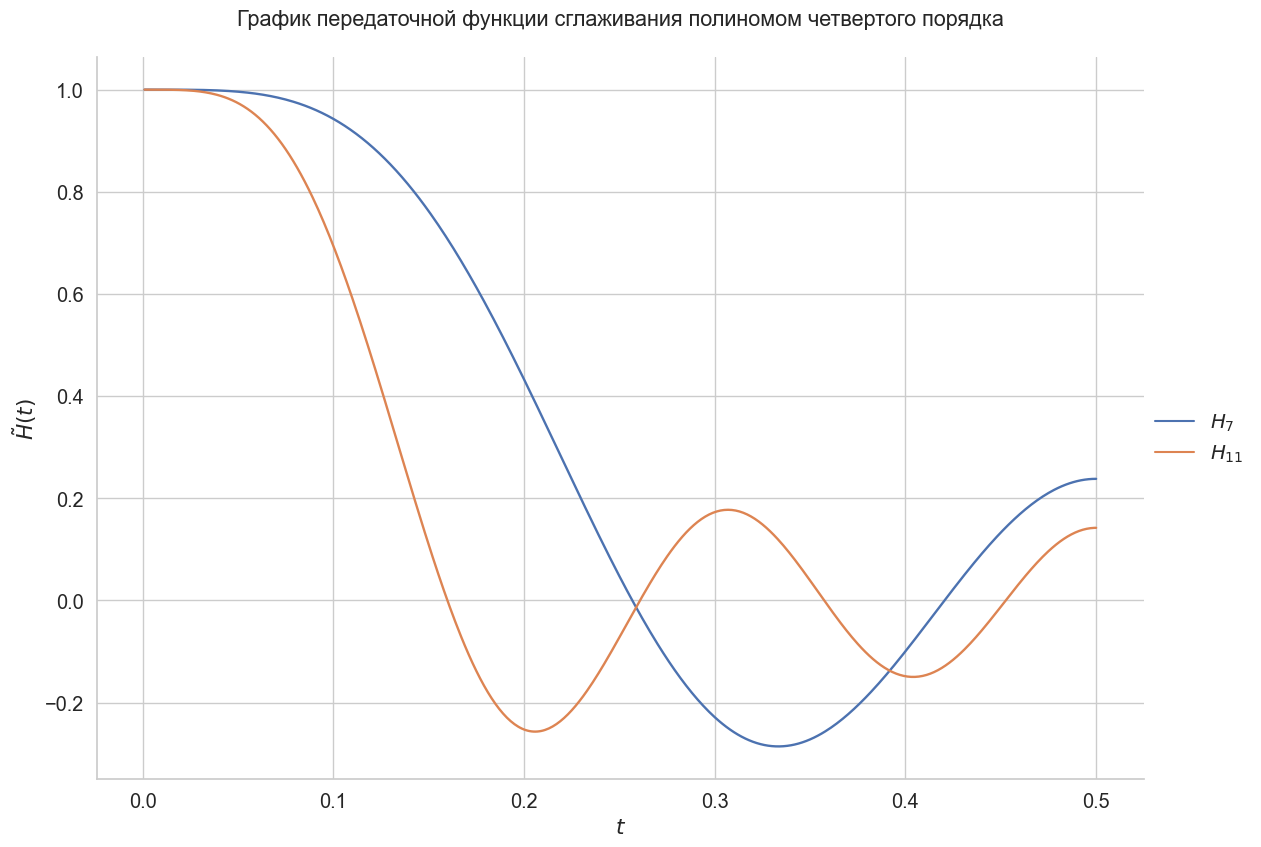

In [23]:
df = pd.DataFrame({'t': th, r'$H_7$': H_7(th), r'$H_{11}$': H_11(th)})
df_m = df.melt(id_vars='t', var_name='', value_name='vals')
plot_H(df_m, "График передаточной функции сглаживания полиномом четвертого порядка\n")

Анализируя графики можно заметить, что полученные спектры после фильтрации схожи с таковыми при сглаживании полиномом 2-й степени, но в данном случае наблюдается более широкая пологая часть пропускания низких частот практически без ослабления. При сглаживании по 11-и точкам можно заметить, что полоса пропускания становится более узкая, это видно на спектре: большее число дискретных отсчётов ослабляется.

## Выводы

В ходе лабораторной работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).